### Import essential libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
from sklearn.preprocessing import MultiLabelBinarizer
pd.set_option('display.max_columns', None) #I want to manually check all my columns

### Load Data

In [58]:
animeData = pd.read_csv('Anime_data.csv')
print(f"Number of Rows: {animeData.shape[0]}")
print(f"Number of Cols: {animeData.shape[1]}")
animeData.head()

Number of Rows: 2851
Number of Cols: 7


,Name,Type,Rating,Rank,Description,Tags,NTags
0,The Apothecary Diaries,TV\r\n(14+ eps),"4.589 out of 5 from 2,728 votes",Rank #1,"In the East is a land ruled by an emperor, who...","{'Maids', 'Romance', 'Doctors', 'Political', '...","{'Mature Themes,', 'Prostitution'}"
1,Heaven Official's Blessing 2nd Season,Web\r\n(11+ eps x 26 min),4.578 out of 5 from 491 votes,Rank #2,When Xie Lian is sent on a mission to Ghost Ci...,"{'Romance', 'Royalty', 'Based on a Web Novel',...","{'Physical Abuse', 'Explicit Violence,'}"
2,Fullmetal Alchemist: Brotherhood,TV\r\n(64 eps),"4.57 out of 5 from 83,697 votes",Rank #3,The foundation of alchemy is based on the law ...,"{'Military', 'Fantasy', 'Siblings', 'Death of ...","{'Domestic Abuse', 'Violence,', 'Animal Abuse,..."
3,Fruits Basket the Final Season,TV\r\n(13 eps),"4.561 out of 5 from 9,674 votes",Rank #4,The final arc of Fruits Basket.,"{'Romance', 'Dysfunctional Families', 'Fantasy...","{'Suicide,', 'Emotional Abuse,', 'Domestic Abu..."
4,Demon Slayer: Kimetsu no Yaiba - Entertainment...,TV\r\n(11 eps),"4.558 out of 5 from 24,057 votes",Rank #5,Tanjiro and his friends accompany the Hashira ...,"{'Siblings', 'Swordplay', 'Historical', 'Based...",{'Explicit Violence'}


### Cleaning the Data

- Isolated independent and dependent variable columns (Rating, Tags, NTags)
- Dummy encode Tags and NTags columns
- Convert Rating from str to float

In [59]:
animeData = animeData.drop(['Type','Rank','Description'], axis=1)
animeData = animeData.fillna('')

for i in range(len(animeData)):
    animeData.iloc[i, 1] = animeData.iloc[i, 1].split()[0]

    animeData.iloc[i, 2] = animeData.iloc[i, 2].replace('{', '')
    animeData.iloc[i, 2] = animeData.iloc[i, 2].replace('}', '')
    animeData.iloc[i, 2] = animeData.iloc[i, 2].replace("'", "")
    animeData.iloc[i, 2] = animeData.iloc[i, 2].replace('"', "")
    
    animeData.iloc[i, 3] = animeData.iloc[i, 3].replace('{', '')
    animeData.iloc[i, 3] = animeData.iloc[i, 3].replace('}', '')
    animeData.iloc[i, 3] = animeData.iloc[i, 3].replace("'", "")
    animeData.iloc[i, 2] = animeData.iloc[i, 2].replace('"', "")

animeData['Rating'] = pd.to_numeric(animeData['Rating'])
    
mlb = MultiLabelBinarizer()
t = animeData.pop('Tags').str.replace(', ', ',', regex=False).str.split(',')
nt = animeData.pop('NTags').str.replace(', ', ',', regex=False).str.split(',')
ct = t.combine(nt, lambda x, y : list( (set(x)-{''}) | (set(y)-{''}) ) )

tags = pd.DataFrame(mlb.fit_transform(ct), columns=mlb.classes_, index=animeData.index)
animeData = animeData.join(tags)
animeData = animeData.drop('Name', axis = 1)

In [104]:
#Have Verified that after all these cleaning the value remains at 2851 rows
print(f"Number of Rows: {animeData.shape[0]}")
print(f"Number of Cols: {animeData.shape[1]}")
animeData.head(10)

Number of Rows: 2851
Number of Cols: 522


,Rating,10th Century,11th Century,12th Century,14th Century,15th Century,16th Century,18th Century,19th Century,4th Century,6th Century,7th Century,8th Century,Abstract,Acting,Action,Adult Couples,Adventure,Africa,Afterlife,Age Gap,Age Transformation,Aging,Agriculture,Alcohol,Alice in Wonderland,Aliens,All-Boys School,All-Girls School,America,Amnesia,Amusement Park,Ancient China,Androids,Androphobia,Angels,Animal Abuse,Animal Characteristics,Animal Protagonists,Animal Transformation,Anime Industry,Anime Tamago,Anime no Me,Animeism,Antarctica,Anthropomorphic,Apartment Life,Apocalypse,Apprenticeship,Aquarium,Archery,Arranged Marriage,Art,Art School,Assassins,Astronauts,Astronomy,Autobiographies,Aviation,BL,Baking,Ballet Dancing,Bar,Baseball,Based on a 4-Koma Manga,Based on a Card Game,Based on a Comic Book,Based on a Doujinshi,Based on a Fairy Tale,Based on a Light Novel,Based on a Manga,Based on a Mobile Game,Based on a Movie,Based on a Novel,Based on a Play,Based on a Song,Based on a TV Series,Based on a Video Game,Based on a Visual Novel,Based on a Web Novel,Based on a Webtoon,Based on an Eroge,Based on an Otome Game,Basketball,Battle Royale,Bears,Belgium,Betrayal,Billiards,Biographies,Birds,Black and White,Blackmail,Board Games,Boarding House,Boarding School,Body Sharing,Body Swapping,Bodyguards,Borderline H,Boss-Employee Relationship,Bounty Hunters,Boxing,Breaking the Fourth Wall,Brother Complex,Buddhism,Bullying,Butlers,CG Animation,Cafe,Camping,Canada,Cannibalism,Card Battles,Cars,Catholic School,Cats,Cheats,Chibi,Child Protagonists,Childcare,Childhood Friends,Childhood Promise,Chinese Animation,Christianity,Christmas,Circus,Classical Music,Codependency,Cohabitation,Collections,College,Combining Mecha,Comedy,Coming of Age,Commercials,Concubines,Conspiracy,Contemporary Fantasy,Convenience Store,Cooking,Countryside,Coworkers,Crime,Criminals,Crossdressing,Crossover,Crude,Culinary School,Cultivation,Curse,Cyberpunk,Cyborgs,Cycling,Dancing,Dark Comedy,Dark Fantasy,Deal with the Devil,Death of a Loved One,Debt,Delinquents,Demon King,Demons,Dentists,Desert,Detectives,Dinosaurs,Disability,Disney,Doctors,Dogs,Domestic Abuse,Doujinshi Industry,Dragon Quest,Dragons,Drama,Dream World,Dungeon,Dysfunctional Families,Dystopia,Earthquake,Ecchi,Economics,Editors,Educational,Elemental Powers,Elves,Emotional Abuse,England,Environmental,Episodic,Espionage,Esports,Europe,Exorcists,Explicit Sex,Explicit Violence,Fake Romance,Family Friendly,Family Life,Fantasy,Fashion,Fated Lovers,Fetish,Feudal Japan,Firefighters,Fishing,Flash Animation,Food Protagonists,Food and Beverage,Football,Forest,Framed for a Crime,France,French Revolution,Frogs,Fudanshi,Fujoshi,GL,Gag,Gambling,Game Elements,Gangs,Gender Bender,Gender Identity,Genies,Germany,Ghibli Museum Shorts,Ghost Hunters,Ghosts,Go,God-Human Relationship,Gods,Golf,Greek Mythology,Guilds,Guns,Gyaru,Gymnastics,Gynophobia,Hacking,Hamsters,Hand to Hand Combat,Harem,Heaven,Hell,High Stakes Games,Historical,Hokkaido,Horror,Horse Racing,Hosts,Hotels and Inns,Human Experimentation,Human Livestock,Ice Skating,Idols,Illness,India,Insects,Interspecies Relationship,Isekai,Island,Isolated Society,Italy,Iyashikei,Japan Animators Exhibition,Japanese Mythology,Josei,Journey to the West,Jungle,Kaijuu,Kickboxing,Kidnapping,Kingdom Building,Korean Animation,LGBT Themes,Lawyers,Leijiverse,Library,Lifestyle Change,Loneliness,Love Confession,Love Triangle,MMORPG,Mafia,Magic,Magic School,Magical Girl,Mahjong,Maids,Management,Manga Industry,Mansion,Married Life,Mars,Martial Arts,Master-Servant Relationship,Mature Romance,Mature Themes,Mecha,Medical,Medieval,Melancholy,Mental Illness,Mercenaries,Mermaids,Middle Eastern,Military,Military School,Mind Games,Modelling,Modern Knowledge,Monster Girls,Monster School,Monster-of-the-week,Monsters,Motorcycles,Mountain Climbing,Music,Music School,Mysterious Shop,Mystery,NEET,Natural Disaster,Neighbors,Newly Co-ed School,Ninja,No Dialogue,Nobility,Noir,Non-Human Protagonists,Norse Myt

# Data Exploration

### Useful Dataframes

In [107]:
tags = animeData.drop('Rating', axis=1)
rating = animeData['Rating']

## Independent Variables Exploration

### Number of Independent Variables

In [108]:
ntags_set = set()
tags_set = set()

for i in nt:
    ntags_set.update(i)
ntags_set.remove('')

for i in t:
    tags_set.update(i)
tags_set -= ntags_set

ntags_count = len(ntags_set)
tags_count = len(tags_set)

print(f"Number of Tags: {tags_count:10}")
print(f"Number of NTags: {ntags_count:9}")
print(f"Total Tags: {ntags_count + tags_count:14}")

Number of Tags:        505
Number of NTags:        16
Total Tags:            521


### Correlation of NTags vs Rating

In [109]:
#Getting the correlation matrix
corr = animeData.corr()

                NTags    Rating
0              Nudity -0.030389
1        Sexual Abuse  0.022548
2        Prostitution  0.068478
3      Domestic Abuse  0.108871
4           Self-Harm  0.038319
5      Physical Abuse  0.093485
6      Sexual Content  0.010434
7        Animal Abuse  0.076583
8            Violence  0.157459
9         Cannibalism  0.064192
10    Emotional Abuse  0.073523
11       Explicit Sex  0.022462
12           Bullying  0.049605
13  Explicit Violence  0.139199
14            Suicide  0.101632
15      Mature Themes  0.143523

          Rating
count  16.000000
mean    0.071245
std     0.051981
min    -0.030389
25%     0.034376
50%     0.071001
75%     0.103442
max     0.157459


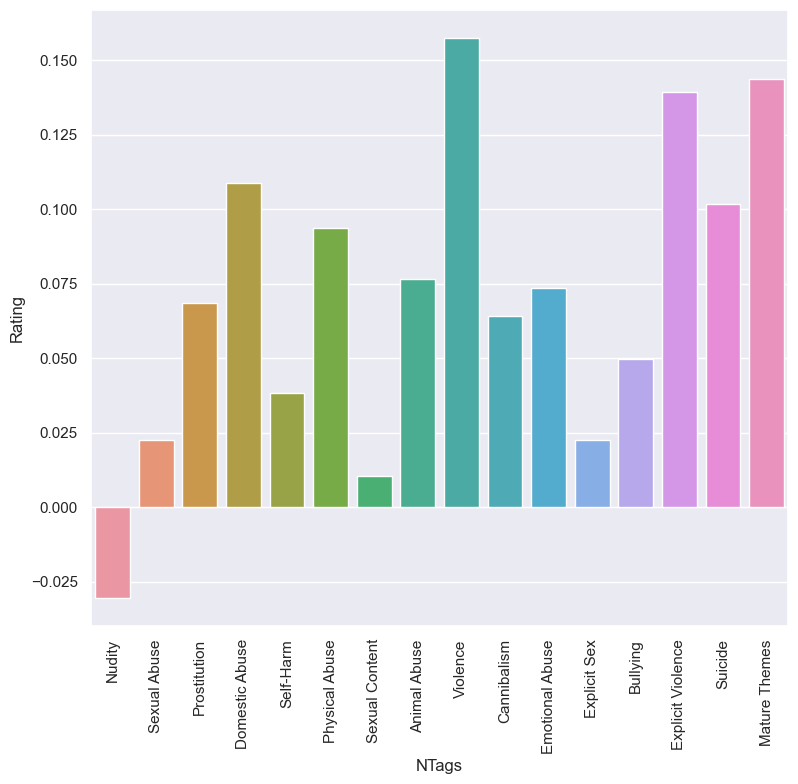

In [88]:
ntags_corr_w_rating = pd.DataFrame(corr.loc[list(ntags_set)]['Rating']).rename_axis('NTags').reset_index(drop=False)

print(ntags_corr_w_rating)
print()
print(ntags_corr_w_rating.describe())

f, ax = plt.subplots(figsize=(9, 8))
plt.xticks(rotation=90)
sb.barplot(data = ntags_corr_w_rating, y = 'Rating', x = 'NTags')
plt.show()

#### Observation   
Expected some sort of negative correlation, however this is apparently not the case   
Overall low correlations across the board

### Correlation of Tags vs Rating

                    Tags    Rating
0                   Yuri -0.022232
1           CG Animation -0.036961
2                Recipes -0.012935
3                  Mafia  0.062683
4       Post-apocalyptic  0.020662
..                   ...       ...
500    Convenience Store -0.020817
501               Shoujo  0.052729
502             Pandemic -0.015049
503  Star-Crossed Lovers  0.006424
504        Psychological  0.085616

[505 rows x 2 columns]

           Rating
count  505.000000
mean     0.011558
std      0.037710
min     -0.113945
25%     -0.015417
50%      0.006353
75%      0.032467
max      0.205098


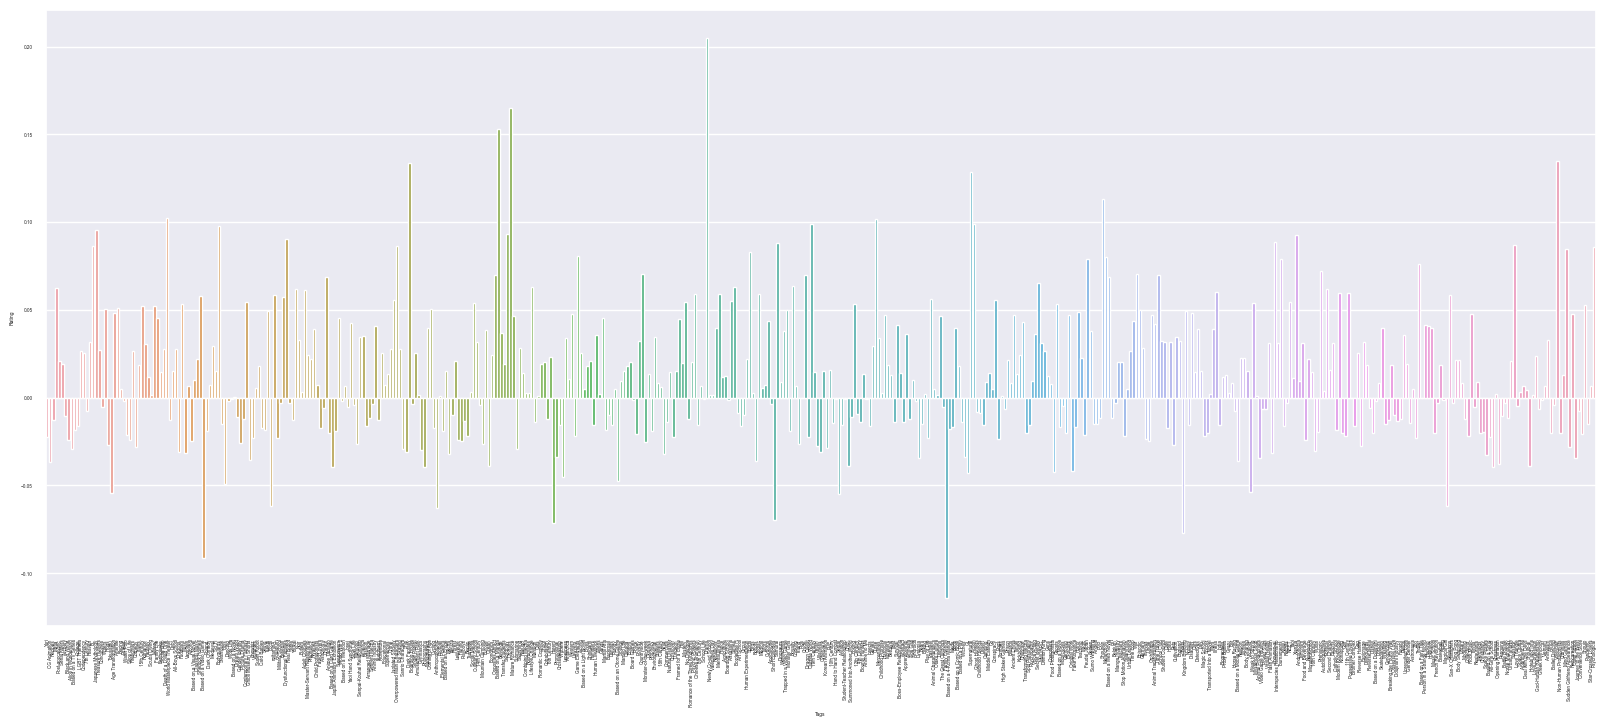

In [94]:
tags_corr_w_rating = pd.DataFrame(corr.loc[list(tags_set)]['Rating']).rename_axis('Tags').reset_index(drop=False)

print(tags_corr_w_rating)
print()
print(tags_corr_w_rating.describe())

f, ax = plt.subplots(figsize=(20, 8))
plt.xticks(rotation=90)
sb.barplot(data = tags_corr_w_rating, y = 'Rating', x = 'Tags')
plt.show()

### Observation
Very low mean correlation with rating, similar to NTags   
Expected both positive and negative correlations and was glad to see that is the caserd

### Mean Rating per Tag

In [114]:
arr = np.array([])
sb.set(font_scale=1)
for i in animeData.head(0):
    index = 0
    freq = 0
    s = 0
    if (i == 'Rating'):
        continue
    for j in animeData[i]:
        if (j == 1):
            freq+= 1
            s += animeData['Rating'].iloc[index]
        index+= 1
    avg = s/freq
    arr = np.append(arr, avg)

tag_list = tags.columns.tolist()

temp = pd.DataFrame(data = tag_list)

temp.columns = ['Tag']
temp.insert(1, 'Mean Rating', value = arr)
tag_meanrating_DF = temp

tag_meanrating_DF = tag_meanrating_DF.sort_values(by='Mean Rating', ascending = True)

top_10_tags = tag_meanrating_DF.tail(10)
bot_10_tags = tag_meanrating_DF.head(10)

#### Top 10 tags by mean rating

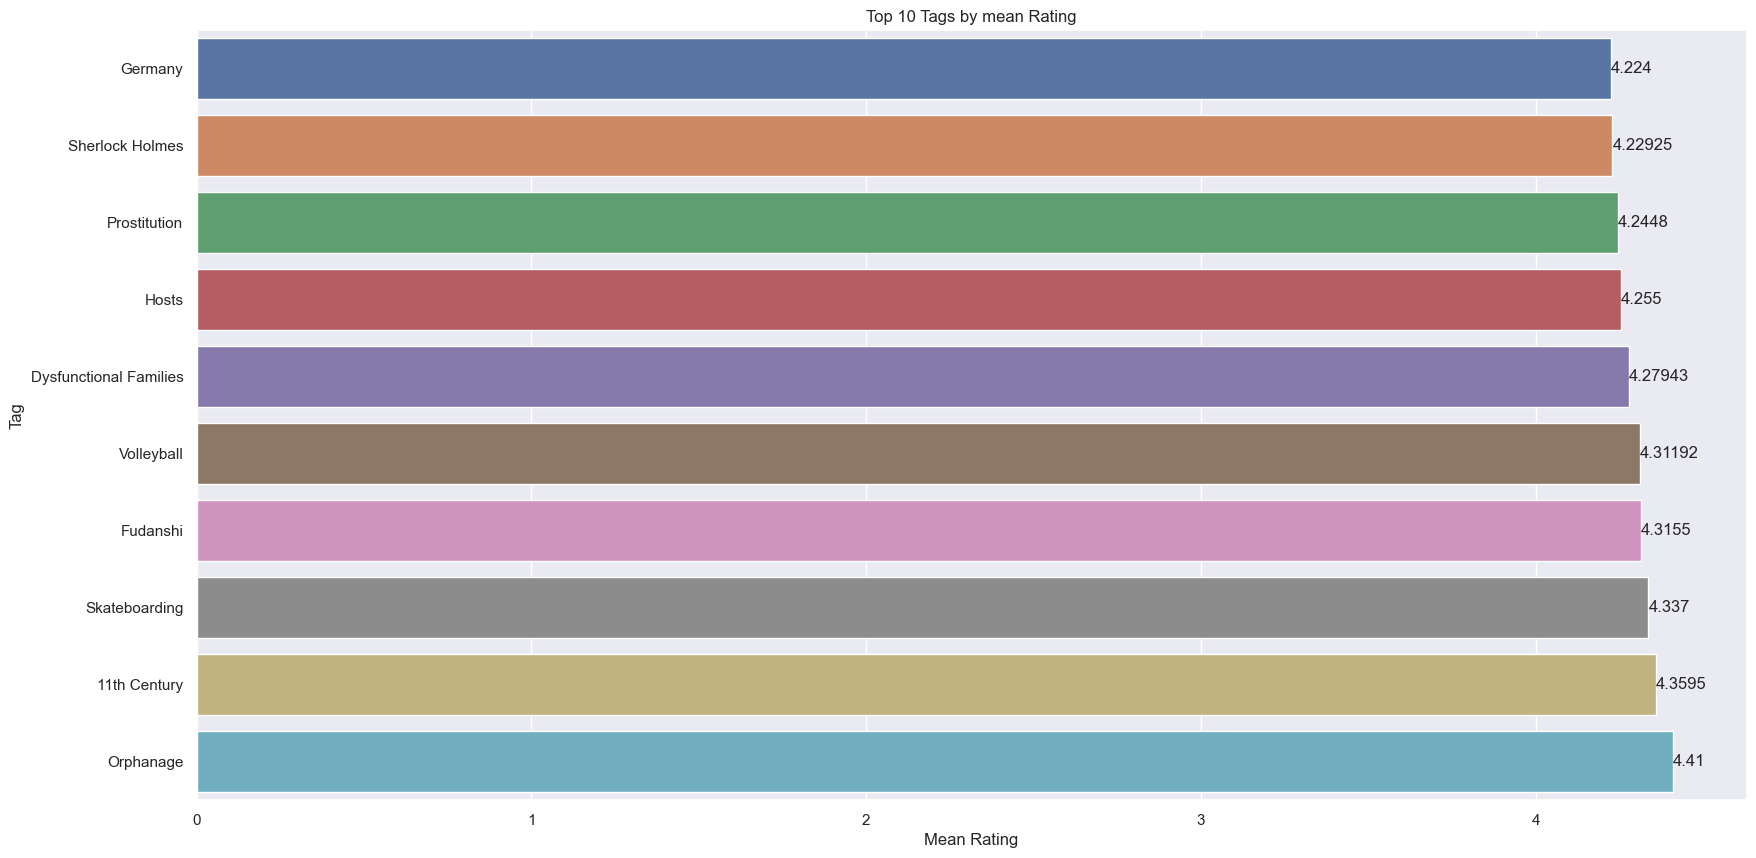

In [115]:
plt.figure(figsize=(20, 10))


ax= sb.barplot(x='Mean Rating', y='Tag', data = top_10_tags, orient = "h")


ax.bar_label(ax.containers[0])


plt.title('Top 10 Tags by mean Rating')
plt.xlabel('Mean Rating')
plt.ylabel('Tag')


plt.show()

#### Bottom 10 Tags by mean rating

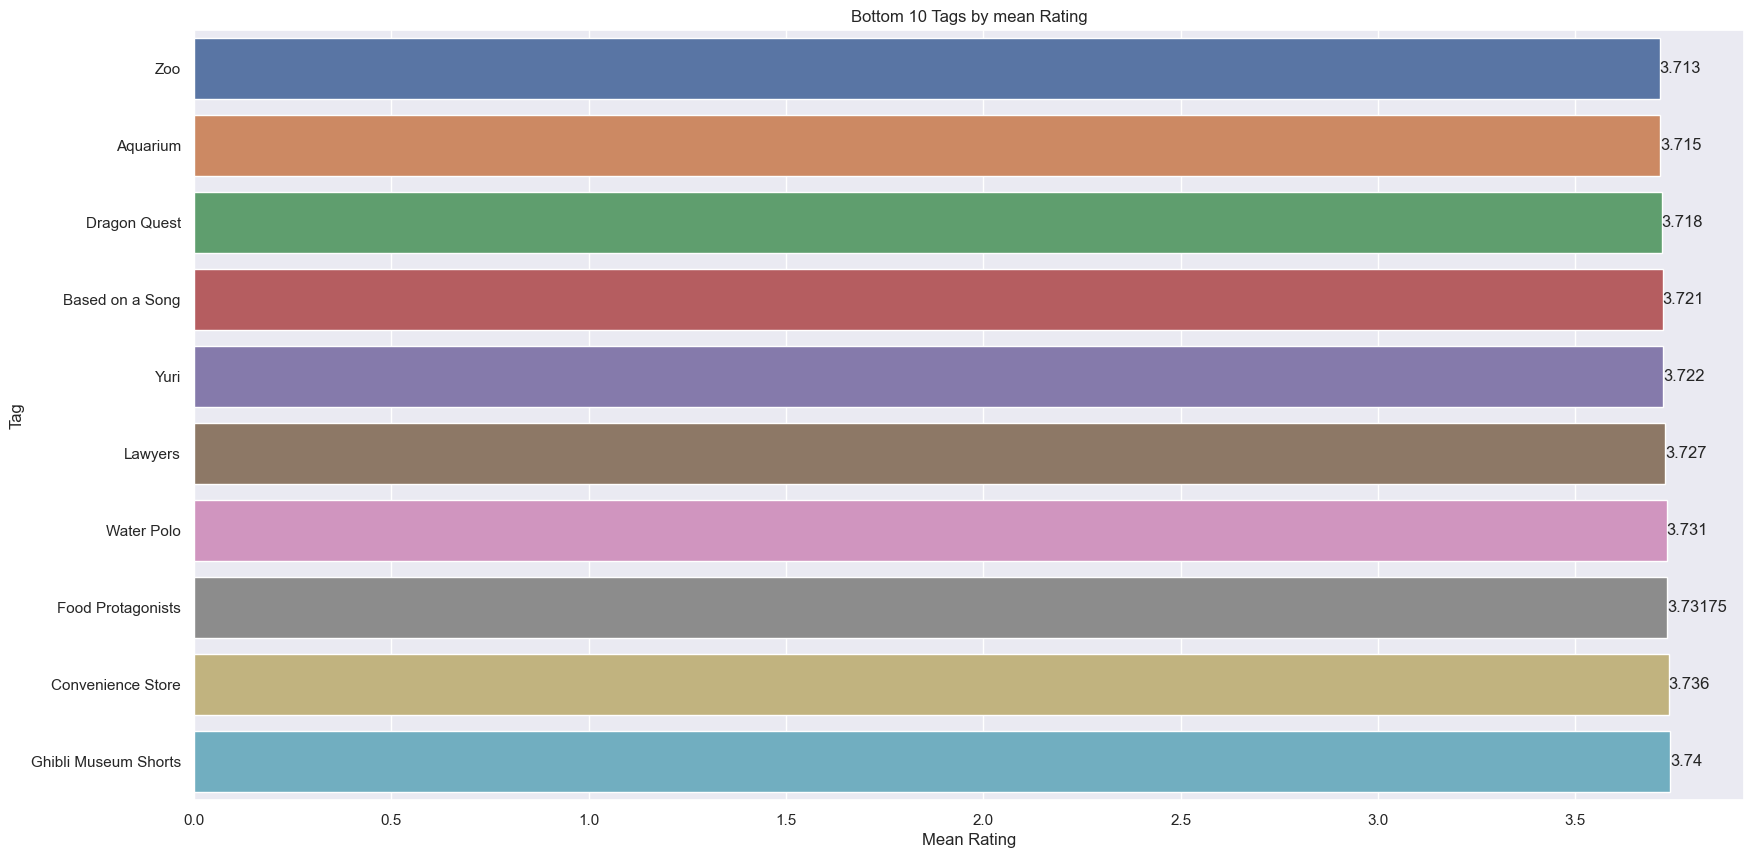

In [116]:
plt.figure(figsize=(20, 10))


ax= sb.barplot(x='Mean Rating', y='Tag', data = bot_10_tags, orient = "h")


ax.bar_label(ax.containers[0])


plt.title('Bottom 10 Tags by mean Rating')
plt.xlabel('Mean Rating')
plt.ylabel('Tag')


plt.show()

### Observation
Interesting to see an Ntag "Prostitution" in the top 10 tags by mean rating, further reinforces the idea that there is not neccesarily a negative correlation between ntags and rating   
Worth noting is that mean may not be very good as a metric as each tag has a different number of entries (as we will see later)

### Exploring Multicolinnearity

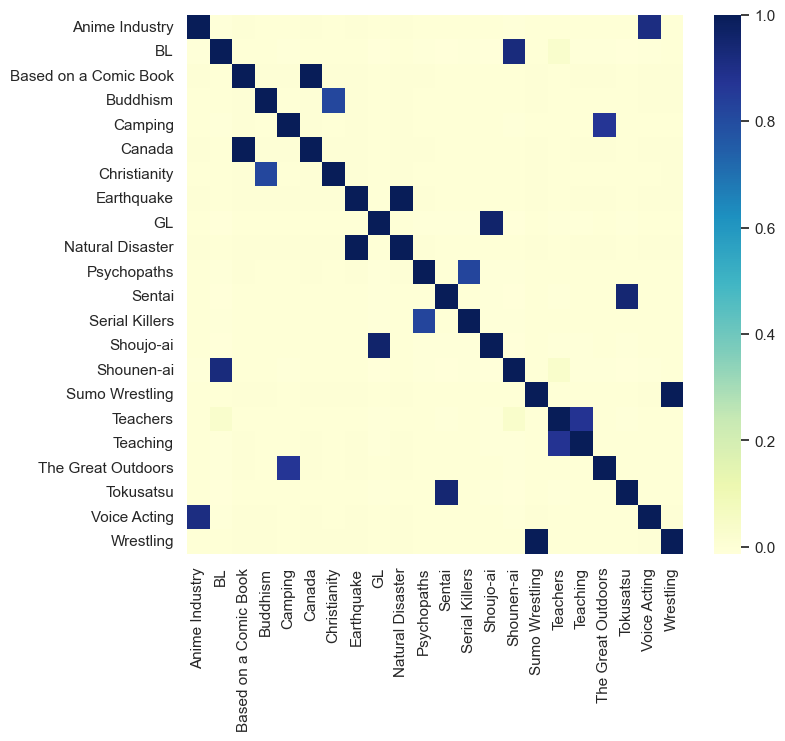

In [122]:
#Isolate heatmap of all independent variables with correlation higher than 0.8 with another variable
from itertools import combinations

#sb.set(font_scale=0.6)
f, ax = plt.subplots(figsize=(8, 7))

def highpassfilter(df, threshold):
    passed = set()
    for (row,col) in combinations(df.columns, 2):
        if (abs(df.loc[row,col]) >= threshold):
            passed.add(row)
            passed.add(col)
    passed = sorted(passed)
    return df.loc[passed,passed]

sb.heatmap(highpassfilter(corr,0.8), cmap="YlGnBu")
plt.show()

### Observation
There indeed exists some variables that are highly correlated with another, a sign of multicollinearity. Might affect models later, take note

### Exploring Number of Occurences of Each Variable

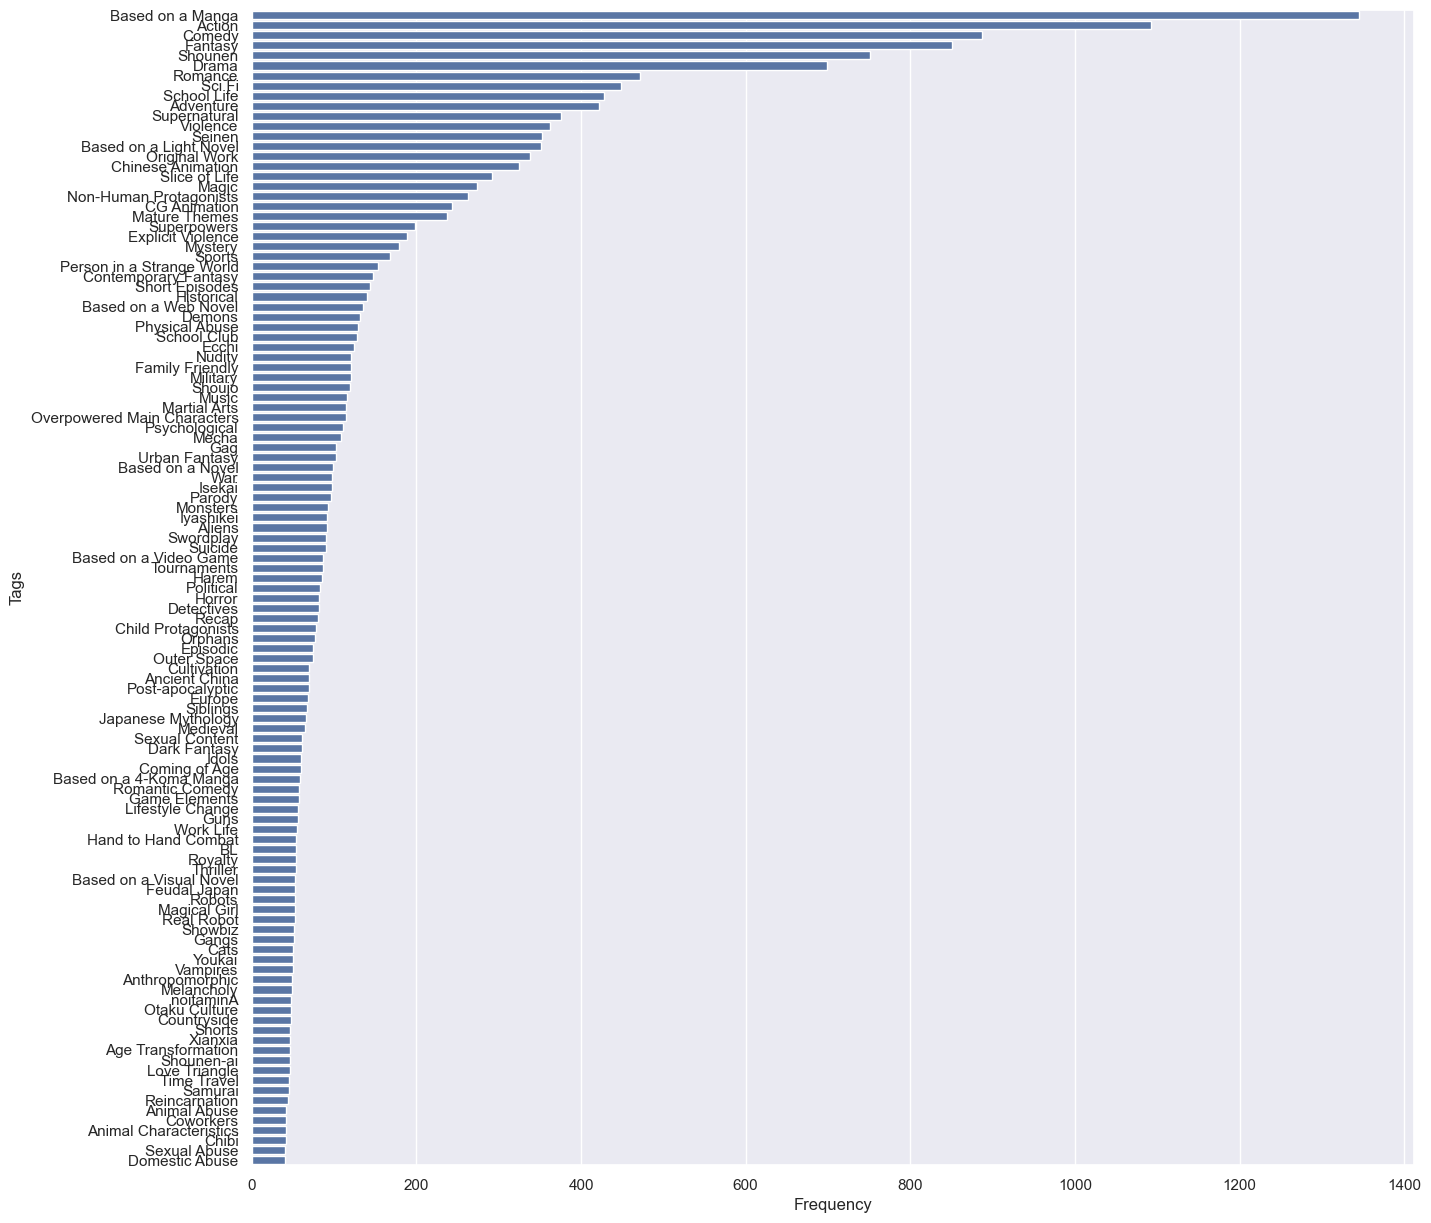

In [123]:
#Most frequently seen tag
sums = []
for column in animeData.columns[2:]:
    sums.append(animeData[column].sum())

frequencies = pd.DataFrame(np.column_stack([animeData.columns[2:], sums]), columns=['Tags', 'Frequency']).sort_values(by=['Frequency'], ascending=False)
    
    
f, ax = plt.subplots(figsize=(15, 15))
sb.barplot(x="Frequency", y="Tags", data=frequencies[0:115],
            label="Total", color="b")
plt.show()

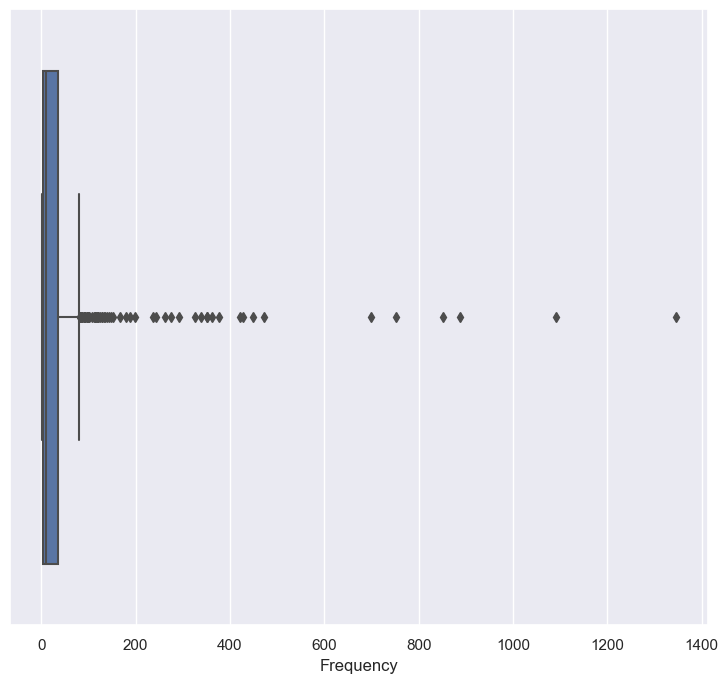

count     520.000000
mean       43.784615
std       118.318696
min         1.000000
25%         4.000000
50%        11.000000
75%        35.000000
max      1345.000000
Name: Frequency, dtype: float64

In [124]:
x = pd.to_numeric(frequencies['Frequency'])

f, ax = plt.subplots(figsize=(9, 8))
sb.boxplot(x = x)
plt.show()
x.describe()

### Observation
Massive class imbalance present among the independent variables   
High standard deviation when plotted out as boxplot, with many many outliers   
Averagely, one tag appears in about 43 different anime, with the highest ("Based on a Manga") appearing in 1345 different anime

## Dependent Variable Exploration

### Violinplot to see Distribution of Rating

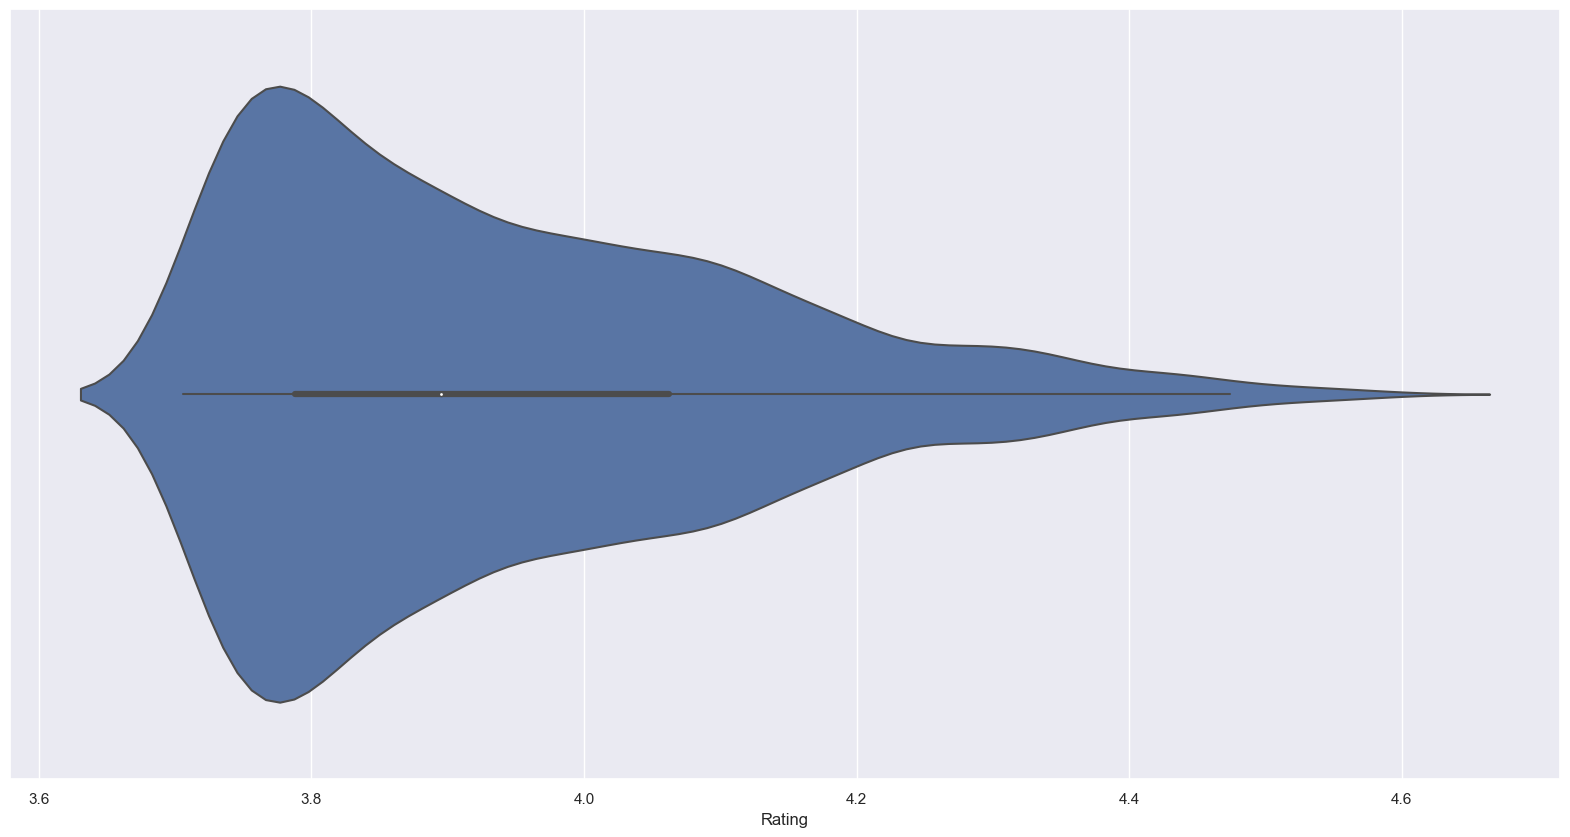

count    2851.000000
mean        3.941986
std         0.185383
min         3.706000
25%         3.788000
50%         3.895000
75%         4.062500
max         4.589000
Name: Rating, dtype: float64

In [126]:
f, ax = plt.subplots(figsize=(20, 10))
sb.violinplot(x=animeData['Rating'])
plt.show()
animeData['Rating'].describe()

### Observation
Slightly right skewed distribution   
Rating is supposed to range from 0 - 5, yet it's interesting how there are no ratings below 3.7, likely due to user bias when voting